In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import torch
import torch.nn as nn

import torch.optim as optim

import sys
sys.path.insert(0, '../libraries/')

import mnist_data_utils 
import mnist_vae_lib
import vae_training_lib

import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as f

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Load data

In [2]:
data_dir = '../mnist_data/'
propn_sample = 0.05

In [3]:
train_set, test_set = mnist_data_utils.get_moving_mnist_dataset(data_dir, propn_sample)

In [4]:
batchsize = 5

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batchsize,
                 shuffle=True)

test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batchsize,
                shuffle=False)


In [5]:
for batch_idx, d in enumerate(train_loader):
    data_train = d
    break
    
for batch_idx, d in enumerate(test_loader):
    data_test = d
    break

In [6]:
slen = data_train['image'].shape[-1]

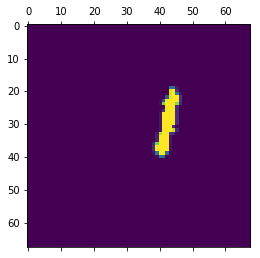

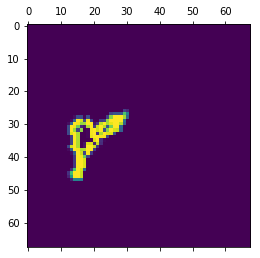

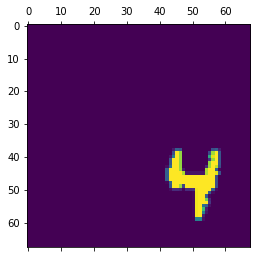

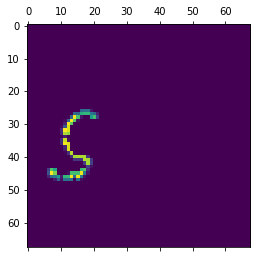

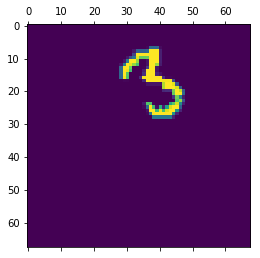

In [7]:
for i in range(batchsize): 
    plt.matshow(data_train['image'][i, 0, :, :])

# Define VAE

In [8]:
image = data_train['image']
pixel_2d = data_train['pixel_2d']

In [9]:
moving_mnist_vae = mnist_vae_lib.MovingHandwritingVAE()

In [10]:
moving_mnist_vae.get_pm_loss(image)

(tensor(13431.8369), tensor(2148.9409))

In [11]:
# Check padding and cropping functions

In [12]:
mnist_slen = 28
cropped_images = moving_mnist_vae.crop_image(image, pixel_2d)

In [13]:
cropped_images.shape

torch.Size([5, 1, 29, 29])

In [14]:
repadded_images = moving_mnist_vae.pad_image(cropped_images, pixel_2d)

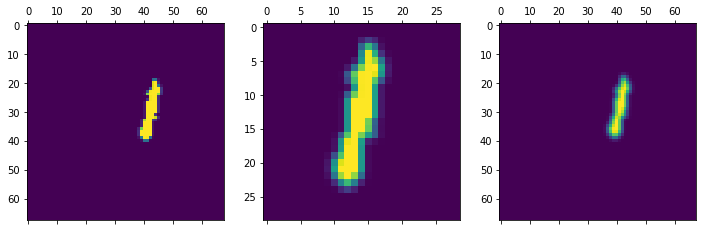

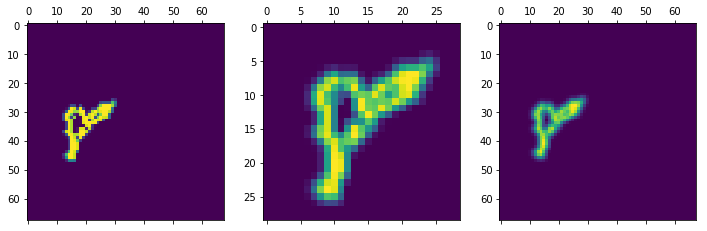

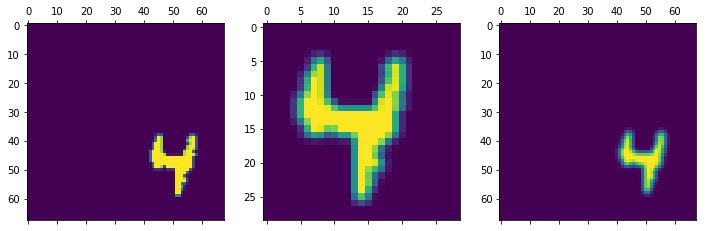

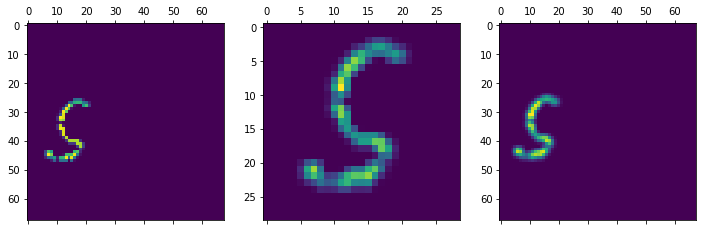

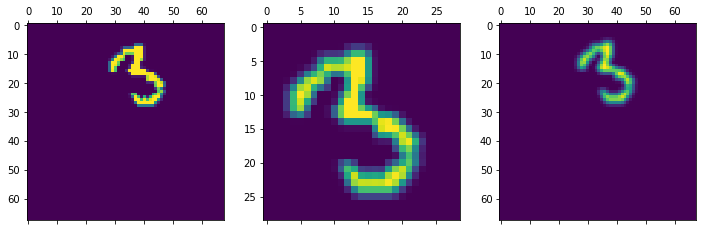

In [15]:
for i in range(batchsize): 
        
    _, axarr = plt.subplots(1, 3, figsize=(12, 12))
    
    axarr[0].matshow(image[i, 0, :, :])
    axarr[1].matshow(cropped_images[i, 0, :, :])
    axarr[2].matshow(repadded_images[i, 0, :, :])

In [16]:
image.shape

torch.Size([5, 1, 68, 68])

In [17]:
cropped_images.shape

torch.Size([5, 1, 29, 29])

In [18]:
repadded_images.shape

torch.Size([5, 1, 68, 68])

# Check training goes through

In [19]:
weight_decay = 1e-6
lr = 0.001

optimizer = optim.Adam([
                {'params': moving_mnist_vae.parameters(),
                'lr': lr,
                'weight_decay': weight_decay}])

In [20]:
vae_training_lib.train_vae(moving_mnist_vae, train_loader, test_loader, optimizer,
                outfile = './test',
                n_epoch = 5, print_every = 2, save_every = 2, 
                set_true_loc = True)

  * init train recon loss: 448.3603516;
  * init test recon loss: 450.1730347;
[1] unlabeled_loss: 258.8828735  	[144.1 seconds]
[2] unlabeled_loss: 225.35849  	[139.6 seconds]
  * train recon loss: 225.9944458;
  * test recon loss: 218.5578613;
writing the parameters to ./test_epoch2

[3] unlabeled_loss: 226.5108032  	[137.1 seconds]
[4] unlabeled_loss: 226.6352539  	[143.3 seconds]
  * train recon loss: 223.2270966;
  * test recon loss: 226.8343506;
writing the parameters to ./test_epoch4

[5] unlabeled_loss: 220.5258942  	[139.4 seconds]
writing the parameters to ./test_final

